In [1]:
import numpy as np
import pandas as pd

In [2]:
cust=pd.read_csv('mallcustomers.csv')
cust.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [55]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [56]:
cust.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [57]:
X=cust[['Annual Income (k$)','Spending Score (1-100)']]
X.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [58]:

from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [59]:
from sklearn.cluster import KMeans
array=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    array.append(kmeans.inertia_)

Text(0.5,0,'#ofcluster')

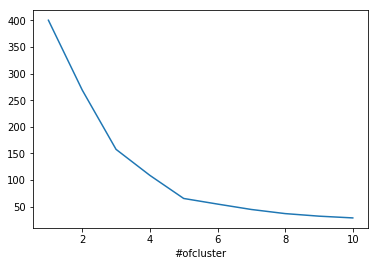

In [64]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),array)
plt.xlabel('#ofcluster')

In [73]:
from sklearn.cluster import KMeans
kmeans=KMeans(init='k-means++',n_clusters=5,n_init=12)
kmeansp=kmeans.fit_predict(X)
labels=kmeans.labels_
print(labels)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 3 2 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 1 0 3 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


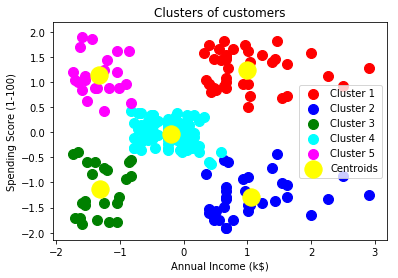

In [74]:
plt.scatter(X[kmeansp == 0, 0], X[kmeansp == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[kmeansp == 1, 0], X[kmeansp == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[kmeansp == 2, 0], X[kmeansp == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[kmeansp == 3, 0], X[kmeansp == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[kmeansp == 4, 0], X[kmeansp == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()